In [15]:
!pip install PyWavelets


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.3/4.3 MB 2.0 MB/s eta 0:00:0000:0100:01


In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [16]:
import pywt
import pywt.data

In [5]:
!pip install opencv-contrib-python


In [6]:
image_path = "/Users/bhumikasharma/Desktop/Sem VI/PE Project/flowers.jpg"  # Update this path if needed
image = cv2.imread(image_path, cv2.IMREAD_COLOR)
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [7]:
def show_image(title, img, cmap=None):
    plt.figure(figsize=(6, 6))
    plt.imshow(img, cmap=cmap)
    plt.title(title)
    plt.axis("off")
    plt.show()

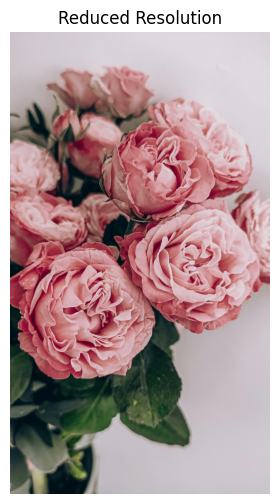

In [8]:
def reduce_resolution(image, scale_percent=50):
    width = int(image.shape[1] * scale_percent / 100)
    height = int(image.shape[0] * scale_percent / 100)
    dim = (width, height)
    resized = cv2.resize(image, dim, interpolation=cv2.INTER_AREA)
    return resized

low_res = reduce_resolution(image, scale_percent=50)
show_image("Reduced Resolution", cv2.cvtColor(low_res, cv2.COLOR_BGR2RGB))

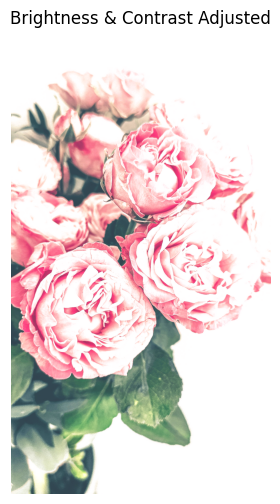

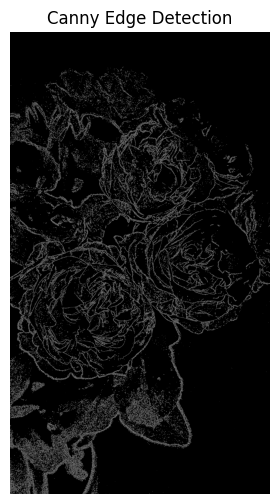

In [9]:
def adjust_brightness_contrast(image, alpha=1.5, beta=50):
    adjusted = cv2.convertScaleAbs(image, alpha=alpha, beta=beta)
    return adjusted

bright_contrast = adjust_brightness_contrast(image, alpha=1.5, beta=50)
show_image("Brightness & Contrast Adjusted", cv2.cvtColor(bright_contrast, cv2.COLOR_BGR2RGB))

# 3. Canny Edge Detection
canny_edges = cv2.Canny(image_gray, 100, 200)
show_image("Canny Edge Detection", canny_edges, cmap="gray")

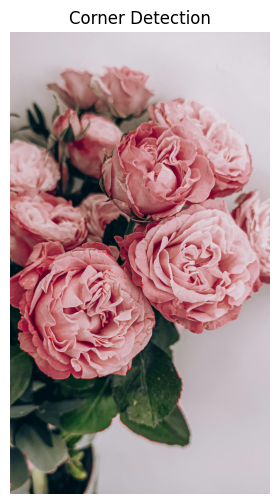

In [10]:
def detect_corners(image_gray):
    corners = cv2.cornerHarris(np.float32(image_gray), 2, 3, 0.04)
    corners = cv2.dilate(corners, None)
    image_corners = image.copy()
    image_corners[corners > 0.01 * corners.max()] = [0, 0, 255]  # Marking corners in red
    return image_corners

corners_detected = detect_corners(image_gray)
show_image("Corner Detection", cv2.cvtColor(corners_detected, cv2.COLOR_BGR2RGB))

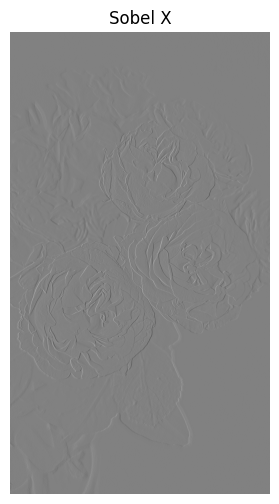

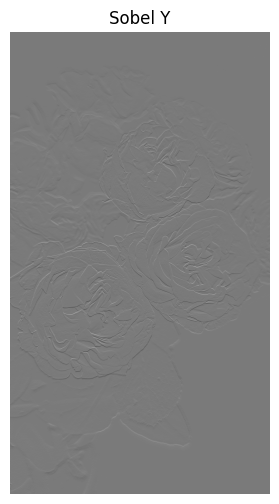

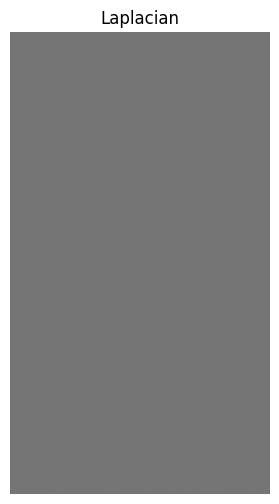

In [11]:
def gradient_edges(image_gray):
    sobel_x = cv2.Sobel(image_gray, cv2.CV_64F, 1, 0, ksize=5)
    sobel_y = cv2.Sobel(image_gray, cv2.CV_64F, 0, 1, ksize=5)
    laplacian = cv2.Laplacian(image_gray, cv2.CV_64F)
    
    show_image("Sobel X", sobel_x, cmap="gray")
    show_image("Sobel Y", sobel_y, cmap="gray")
    show_image("Laplacian", laplacian, cmap="gray")

gradient_edges(image_gray)

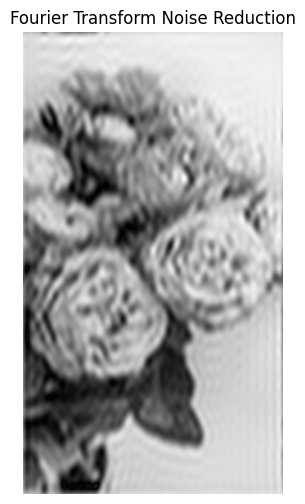

In [12]:
def fourier_transform_denoise(image_gray):
    dft = cv2.dft(np.float32(image_gray), flags=cv2.DFT_COMPLEX_OUTPUT)
    dft_shift = np.fft.fftshift(dft)
    
    # Create a mask to filter high frequencies
    rows, cols = image_gray.shape
    mask = np.zeros((rows, cols, 2), np.uint8)
    center = (rows // 2, cols // 2)
    mask[center[0]-30:center[0]+30, center[1]-30:center[1]+30] = 1
    
    fshift = dft_shift * mask
    f_ishift = np.fft.ifftshift(fshift)
    img_back = cv2.idft(f_ishift)
    img_back = cv2.magnitude(img_back[:, :, 0], img_back[:, :, 1])
    
    return img_back

denoised_image = fourier_transform_denoise(image_gray)
show_image("Fourier Transform Noise Reduction", denoised_image, cmap="gray")

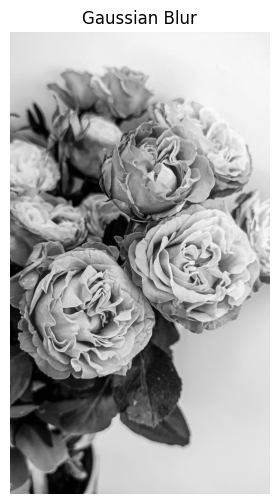

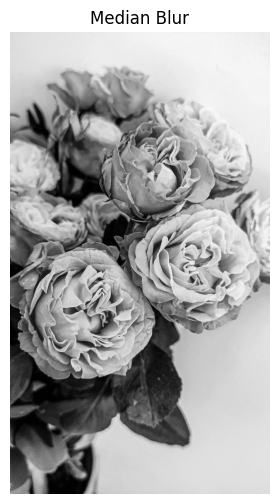

In [13]:
def apply_filters(image_gray):
    gaussian_blur = cv2.GaussianBlur(image_gray, (5, 5), 0)
    median_blur = cv2.medianBlur(image_gray, 5)
    
    show_image("Gaussian Blur", gaussian_blur, cmap="gray")
    show_image("Median Blur", median_blur, cmap="gray")

apply_filters(image_gray)

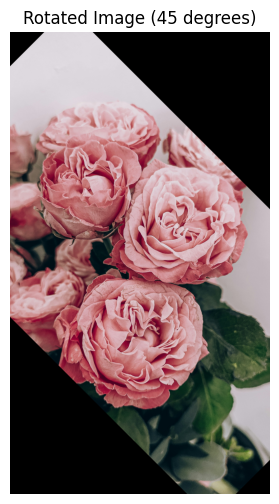

In [14]:
def rotate_image(image, angle):
    (h, w) = image.shape[:2]  # Get image size
    center = (w // 2, h // 2)  # Calculate center
    rotation_matrix = cv2.getRotationMatrix2D(center, angle, 1.0)  # Create rotation matrix
    rotated = cv2.warpAffine(image, rotation_matrix, (w, h))  # Apply rotation
    return rotated

angle = 45  # Change this value to rotate by different degrees
rotated_image = rotate_image(image, angle)
show_image(f"Rotated Image ({angle} degrees)", cv2.cvtColor(rotated_image, cv2.COLOR_BGR2RGB))

In [28]:
image_path = "/Users/bhumikasharma/Desktop/Sem VI/PE Project/flowers.jpg"
image_color = cv2.imread(image_path)


In [31]:
if image_color is None:
    raise FileNotFoundError(f"Image not found at {image_path}")


In [32]:
image_gray = cv2.cvtColor(image_color, cv2.COLOR_BGR2GRAY)


In [33]:
coeffs2 = pywt.dwt2(image_gray, 'haar')  # Or 'db1', 'sym2', etc.
cA, (cH, cV, cD) = coeffs2


In [34]:
def normalize_img(img):
    img = np.absolute(img)
    img = (img - np.min(img)) / (np.max(img) - np.min(img)) * 255
    return img.astype(np.uint8)

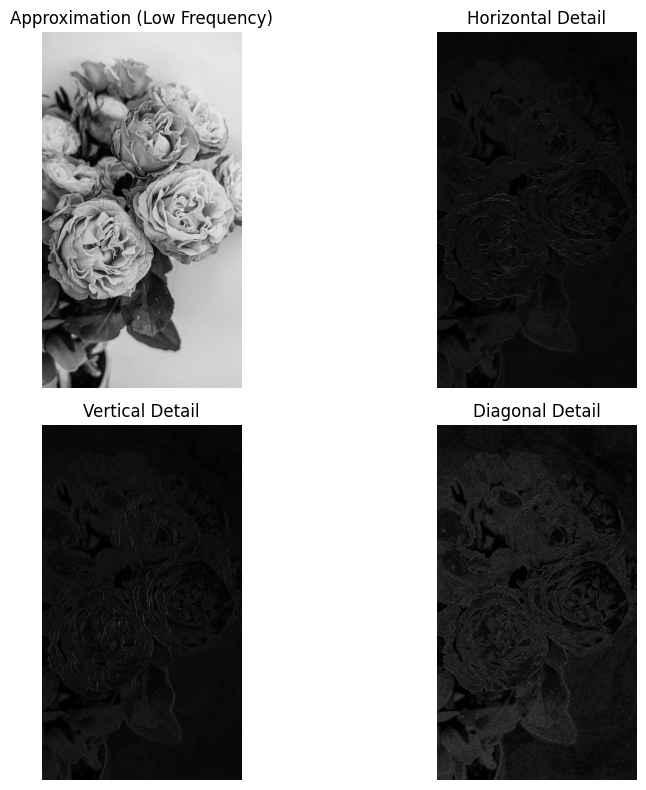

In [35]:
titles = ['Approximation (Low Frequency)', 'Horizontal Detail', 'Vertical Detail', 'Diagonal Detail']
components = [cA, cH, cV, cD]

plt.figure(figsize=(10, 8))
for i, (comp, title) in enumerate(zip(components, titles)):
    plt.subplot(2, 2, i + 1)
    plt.imshow(normalize_img(comp), cmap='gray')
    plt.title(title)
    plt.axis('off')
plt.tight_layout()
plt.show()